In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_data_frame = pd.read_csv(r"..\\raw_data_30m\\currency_pairs\\EURUSD_M30.csv", sep='\t')

In [4]:
raw_data_frame

,Time,Open,High,Low,Close,Volume
0,2007-02-05 10:30:00,1.29246,1.29273,1.29162,1.29273,277811
1,2007-02-05 11:00:00,1.29271,1.29325,1.29240,1.29304,157253
2,2007-02-05 11:30:00,1.29304,1.29351,1.29270,1.29336,106005
3,2007-02-05 12:00:00,1.29331,1.29337,1.29257,1.29297,99885
4,2007-02-05 12:30:00,1.29295,1.29360,1.29231,1.29266,68612
...,...,...,...,...,...,...
199995,2023-02-10 13:00:00,1.06736,1.06766,1.06709,1.06712,3963
199996,2023-02-10 13:30:00,1.06712,1.06751,1.06680,1.06744,5103
199997,2023-02-10 14:00:00,1.06742,1.06750,1.06709,1.06730,3513
199998,2023-02-10 14:30:00,1.06732,1.06786,1.06731,1.06783,2894


In [5]:
# dataframe for close price to calculate 200 ema
close_price = raw_data_frame.drop(['Time', 'Open', 'High', 'Low', 'Volume'], axis=1)


In [6]:
# calculating 200 ema using ewm method in pd
def calculate_ema_200(data, n):
    ema = data.Close.ewm(span=n, adjust=False).mean()
    return ema
ema_200 = calculate_ema_200(close_price, 200)


In [7]:
ema_200 = ema_200.round(6)
ema_200

0         1.292730
1         1.292733
2         1.292739
3         1.292742
4         1.292741
            ...   
199995    1.074366
199996    1.074297
199997    1.074227
199998    1.074163
199999    1.074101
Name: Close, Length: 200000, dtype: float64

In [38]:
# making final dataframe with close price, 200 ema, volume
final_df = raw_data_frame.drop(['Time', 'Open', 'High', 'Low'], axis=1)
final_df['ema_200'] = ema_200


In [39]:
final_df

,Close,Volume,ema_200
0,1.29273,277811,1.292730
1,1.29304,157253,1.292733
2,1.29336,106005,1.292739
3,1.29297,99885,1.292742
4,1.29266,68612,1.292741
...,...,...,...
199995,1.06712,3963,1.074366
199996,1.06744,5103,1.074297
199997,1.06730,3513,1.074227
199998,1.06783,2894,1.074163


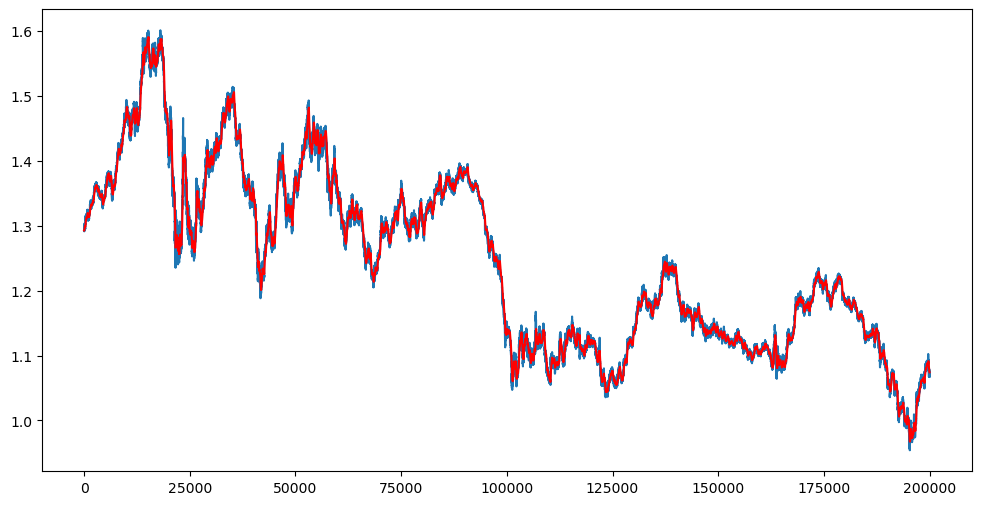

In [40]:
plt.figure(figsize=(12,6))
plt.plot(final_df.Close)
plt.plot(final_df.ema_200, 'r')


In [41]:
# making a Trend column for binary classification of the trend so as to decrease noise  
final_df['Trend'] = [1 if row['Close'] > row['ema_200'] + 0.001 * row['Close']
                        else -1 if row['Close'] < row['ema_200'] - 0.001 * row['Close']
                        else 0 for index, row in final_df.iterrows()]


In [42]:
final_df

,Close,Volume,ema_200,Trend
0,1.29273,277811,1.292730,0
1,1.29304,157253,1.292733,0
2,1.29336,106005,1.292739,0
3,1.29297,99885,1.292742,0
4,1.29266,68612,1.292741,0
...,...,...,...,...
199995,1.06712,3963,1.074366,-1
199996,1.06744,5103,1.074297,-1
199997,1.06730,3513,1.074227,-1
199998,1.06783,2894,1.074163,-1


In [ ]:
# no CROSSOVERS so need to fix 

In [43]:
final_df.to_csv(r"..\\pre_processed_data\\200_ema\\"+'EURUSD_M30.csv')

In [2]:
# loading final dataframe directly
final_df = pd.read_csv('..\\pre_processed_data\\200_ema\\GBPJPY_M30.csv')

In [7]:
final_df = final_df.drop('Unnamed: 0', axis=1)

In [44]:
final_df
# currently eurusd

,Close,Volume,ema_200,Trend
0,1.29273,277811,1.292730,0
1,1.29304,157253,1.292733,0
2,1.29336,106005,1.292739,0
3,1.29297,99885,1.292742,0
4,1.29266,68612,1.292741,0
...,...,...,...,...
199995,1.06712,3963,1.074366,-1
199996,1.06744,5103,1.074297,-1
199997,1.06730,3513,1.074227,-1
199998,1.06783,2894,1.074163,-1


In [18]:
final_df.dtypes

Close      float64
Volume       int64
ema_200    float64
Trend        int64
dtype: object

START FROM HERE

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

In [45]:
x0=[]
x1=[]
x2=[]
y=[]

In [46]:
# taking sample size of 200
for i in range (0, final_df.shape[0] - 200):
    x0.append(final_df.iloc[i:i+200, 0])
    x1.append(final_df.iloc[i:i+200, 1])
    x2.append(final_df.iloc[i:i+200, 2])
    y.append(final_df.iloc[i+200, 3])

In [47]:
x0, x1, x2, y = np.array(x0), np.array(x1), np.array(x2), np.array(y)

In [48]:
y=np.reshape(y, (len(y), 1))

In [57]:
scaler = MinMaxScaler(feature_range=(0,1))
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
scaler = MinMaxScaler(feature_range=(-1,1))
y = scaler.fit_transform(y)

In [58]:
y

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [-1.],
       [-1.],
       [-1.]])

In [59]:
X = np.stack([x0, x1, x2], axis=2)

In [60]:
X.shape

(199800, 200, 3)

In [52]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense
from keras import optimizers

In [61]:
# tts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [62]:
X_train.shape

(159840, 200, 3)

In [63]:
model = Sequential()

In [64]:
model.add(CuDNNLSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(CuDNNLSTM(64, return_sequences=False))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1))
# using tanh later try with sigmoid, and change minmax for reLU

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm (CuDNNLSTM)      (None, 200, 64)           17664     
                                                                 
 cu_dnnlstm_1 (CuDNNLSTM)    (None, 64)                33280     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 55,169
Trainable params: 55,169
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=40)


Epoch 1/100
5000/5000 [==============================] - 58s 11ms/step - loss: 0.6908 - accuracy: 0.4447 - val_loss: 0.6906 - val_accuracy: 0.4431
Epoch 2/100
5000/5000 [==============================] - 52s 10ms/step - loss: 0.6899 - accuracy: 0.4520 - val_loss: 0.6902 - val_accuracy: 0.4518
Epoch 3/100
5000/5000 [==============================] - 53s 11ms/step - loss: 0.6772 - accuracy: 0.4784 - val_loss: 0.5152 - val_accuracy: 0.6659
Epoch 4/100
5000/5000 [==============================] - 53s 11ms/step - loss: 0.2848 - accuracy: 0.7970 - val_loss: 0.1849 - val_accuracy: 0.8354
Epoch 5/100
5000/5000 [==============================] - 53s 11ms/step - loss: 0.2050 - accuracy: 0.8235 - val_loss: 0.1783 - val_accuracy: 0.8336
Epoch 6/100
5000/5000 [==============================] - 53s 11ms/step - loss: 0.1922 - accuracy: 0.8271 - val_loss: 0.1934 - val_accuracy: 0.8296
Epoch 7/100
5000/5000 [==============================] - 54s 11ms/step - loss: 0.1912 - accuracy: 0.8271 - val_loss: 0

In [133]:
model.save('..\models\\200_ema\\200_ema_30m-{epoch:02d}-{loss:.4f}-{val_loss:.4f}-{mae:.4f}-{val_mae:.4f}.hdf5')

In [160]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15347905457019806
Test accuracy: 0.8372250199317932
